In [2]:
import pandas as pd

In [36]:
df_cltv_small_true = pd.read_csv('customer_data_small.csv')
df_cltv_small_true.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200801,20080227,4,21,1,1.83,PRD0900159,CL00029,DEP00008,G00004,...,MM,OT,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
1,200801,20080227,4,21,1,0.86,PRD0900531,CL00026,DEP00008,G00004,...,MM,OT,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
2,200801,20080226,3,16,1,1.12,PRD0900925,CL00035,DEP00009,G00004,...,NaN,NaN,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
3,200801,20080228,5,19,3,3.42,PRD0901465,CL00005,DEP00002,G00001,...,MM,OA,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
4,200801,20080227,4,21,1,0.97,PRD0902700,CL00042,DEP00011,G00004,...,MM,OT,9.941100e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02


In [37]:
df_cltv_small_true['CUST_CODE'].head()

0    CUST0000770451
1    CUST0000770451
2               NaN
3    CUST0000307323
4    CUST0000770451
Name: CUST_CODE, dtype: object

In [38]:
prod_columns = [col for col in df_cltv_small_true.columns if 'PROD' in col]
df_cltv_small = df_cltv_small_true.drop(prod_columns, axis=1)


In [39]:
df_cltv_small.columns

Index(['SHOP_WEEK', 'SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
       'SPEND', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT',
       'STORE_REGION'],
      dtype='object')

In [40]:
groupby_columns = [col for col in df_cltv_small.columns if 'SPEND' not in col]

df_cltv_small_agg = df_cltv_small.groupby(groupby_columns).agg({'SPEND': 'sum'})
df_cltv_small_agg = df_cltv_small_agg.reset_index()

df_cltv_small_agg.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,SPEND
0,200801,20080225,2,8,1,CUST0000016376,UM,OT,9.941100e+14,S,MM,Small Shop,Grocery,STORE01441,LS,E03,0.51
1,200801,20080225,2,8,1,CUST0000092201,MM,OT,9.941100e+14,S,LA,Small Shop,Fresh,STORE00277,LS,N01,2.52
2,200801,20080225,2,8,1,CUST0000101121,MM,OA,9.941100e+14,S,MM,Small Shop,Grocery,STORE00696,XLS,E03,0.01
3,200801,20080225,2,8,1,CUST0000335650,LA,YF,9.941100e+14,L,MM,Top Up,Mixed,STORE01980,LS,N02,3.68
4,200801,20080225,2,8,1,CUST0000372501,MM,YA,9.941100e+14,M,LA,Small Shop,Grocery,STORE00425,MS,E02,3.40


In [41]:
df_cltv_small.shape

(80661, 17)

In [42]:
df_cltv_small_agg.shape

(15733, 17)

In [45]:
df_cltv_large = pd.read_csv('customer_data_large.csv')
df_cltv_large.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0,62,200607,20060416,1,9,1,0.98,PRD0900121,CL00063,...,MM,OT,9.941001e+14,M,LA,Top Up,Fresh,STORE00001,LS,E02
1,1,100,200607,20060414,6,9,1,0.98,PRD0900121,CL00063,...,LA,PE,9.941001e+14,L,MM,Top Up,Mixed,STORE00001,LS,E02
2,2,103,200607,20060414,6,11,7,6.86,PRD0900121,CL00063,...,UM,OT,9.941001e+14,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,3,264,200607,20060415,7,20,1,0.59,PRD0900281,CL00129,...,LA,YF,9.941001e+14,M,UM,Small Shop,Grocery,STORE00001,LS,E02
4,4,271,200607,20060416,1,12,3,2.76,PRD0900296,CL00070,...,XX,PE,9.941001e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02


In [46]:
prod_columns = [col for col in df_cltv_large.columns if 'PROD' in col]
df_cltv_large.drop(prod_columns, axis=1, inplace=True)

In [47]:
df_cltv_large.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype='object')

In [48]:
if 'Unnamed: 0' in df_cltv_large.columns:
    df_cltv_large.drop('Unnamed: 0', axis=1, inplace=True)

df_cltv_large.set_index('0', drop=True, inplace=True)
df_cltv_large.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,,,,,,,,,,,,,,,,,,,,,
62,200607,20060416,1,9,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,MM,OT,9.941001e+14,M,LA,Top Up,Fresh,STORE00001,LS,E02
100,200607,20060414,6,9,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,LA,PE,9.941001e+14,L,MM,Top Up,Mixed,STORE00001,LS,E02
103,200607,20060414,6,11,7,6.86,PRD0900121,CL00063,DEP00019,G00007,...,UM,OT,9.941001e+14,L,LA,Top Up,Fresh,STORE00001,LS,E02
264,200607,20060415,7,20,1,0.59,PRD0900281,CL00129,DEP00046,G00013,...,LA,YF,9.941001e+14,M,UM,Small Shop,Grocery,STORE00001,LS,E02
271,200607,20060416,1,12,3,2.76,PRD0900296,CL00070,DEP00020,G00007,...,XX,PE,9.941001e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02


In [49]:
column_dict = {l:s for s, l in zip(df_cltv_small_true.columns, df_cltv_large.columns)}
column_dict

{'1': 'SHOP_WEEK',
 '2': 'SHOP_DATE',
 '3': 'SHOP_WEEKDAY',
 '4': 'SHOP_HOUR',
 '5': 'QUANTITY',
 '6': 'SPEND',
 '7': 'PROD_CODE',
 '8': 'PROD_CODE_10',
 '9': 'PROD_CODE_20',
 '10': 'PROD_CODE_30',
 '11': 'PROD_CODE_40',
 '12': 'CUST_CODE',
 '13': 'CUST_PRICE_SENSITIVITY',
 '14': 'CUST_LIFESTAGE',
 '15': 'BASKET_ID',
 '16': 'BASKET_SIZE',
 '17': 'BASKET_PRICE_SENSITIVITY',
 '18': 'BASKET_TYPE',
 '19': 'BASKET_DOMINANT_MISSION',
 '20': 'STORE_CODE',
 '21': 'STORE_FORMAT',
 '22': 'STORE_REGION'}

In [50]:

df_cltv_large.rename(columns=column_dict, inplace=True)
df_cltv_large.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,,,,,,,,,,,,,,,,,,,,,
62,200607,20060416,1,9,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,MM,OT,9.941001e+14,M,LA,Top Up,Fresh,STORE00001,LS,E02
100,200607,20060414,6,9,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,LA,PE,9.941001e+14,L,MM,Top Up,Mixed,STORE00001,LS,E02
103,200607,20060414,6,11,7,6.86,PRD0900121,CL00063,DEP00019,G00007,...,UM,OT,9.941001e+14,L,LA,Top Up,Fresh,STORE00001,LS,E02
264,200607,20060415,7,20,1,0.59,PRD0900281,CL00129,DEP00046,G00013,...,LA,YF,9.941001e+14,M,UM,Small Shop,Grocery,STORE00001,LS,E02
271,200607,20060416,1,12,3,2.76,PRD0900296,CL00070,DEP00020,G00007,...,XX,PE,9.941001e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02


In [52]:
prod_columns = [col for col in df_cltv_large.columns if 'PROD' in col]
df_cltv_large = df_cltv_large.drop(prod_columns, axis=1)

In [54]:
groupby_columns = [col for col in df_cltv_large.columns if 'SPEND' not in col]

df_cltv_large_agg = df_cltv_large.groupby(groupby_columns).agg({'SPEND': 'sum'})
df_cltv_large_agg = df_cltv_large_agg.reset_index()

In [55]:
df_cltv_large_agg.shape

(18897, 17)

<AxesSubplot:ylabel='Frequency'>

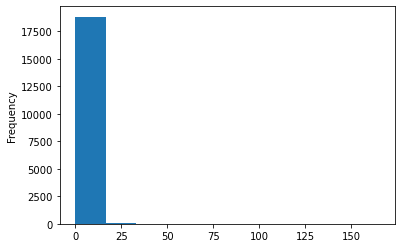

In [57]:
# df_cltv_large_agg.plot(kind)

df_cltv_large_agg['SPEND'].plot.hist()